#Critical CSTR for 3D Van de Vusse kinetics

##Python imports
We shall use the `Sympy` package to perform the symbolic computations.

In [1]:
import sympy
sympy.init_printing(use_unicode=False, wrap_line=False)

##Define Sympy symbols, kinetics and DSR mixing point

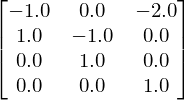

In [2]:
cA,cB,cC,cD = sympy.symbols('c_A, c_B, c_C, c_D')
k1,k2,k3 = sympy.symbols('k1, k2, k3')

##VDV kinetics
#k1=1;
#k2=1;
#k3=10;

rA = -k1*cA - 2.0*k3*cA**2
rB = k1*cA - k2*cB
rC = k2*cB
rD = k3*cA**2

r = sympy.Matrix([rA, rB, rC, rD])
A_bar = sympy.Matrix([[-1., 1., 0., 0.], 
                      [0., -1., 1., 0.], 
                      [-2., 0., 0., 1.]]).T

A_bar

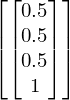

In [3]:
J = r.jacobian(sympy.Matrix([cA,cB,cC,cD]))
N = (A_bar.T).nullspace()
N

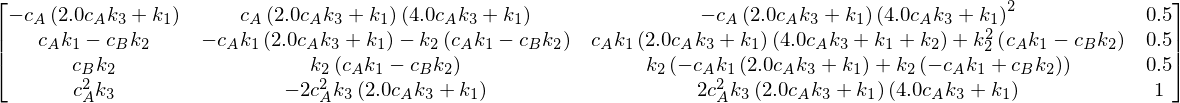

In [4]:
D = sympy.Matrix([r, J*r, J*J*r,N[0]])
D = sympy.simplify(sympy.Matrix(4,4,D).T)
D

In [5]:
#det of a 4x4 matrix
det_fn = sympy.factor(D.det())
det_fn

In [8]:
expr_str = sympy.python(det_fn)
#expr_str = expr_str.replace("**","^")
expr_str = expr_str.replace("Float('","")
expr_str = expr_str.replace("', prec=15)","")
expr_str = expr_str.replace("Rational","")
expr_str = expr_str.replace(", ","/")
#expr_str = expr_str.replace("c_A", "C(1)")
#expr_str = expr_str.replace("c_B", "C(2)")

print expr_str

c_A = Symbol('c_A')
k1 = Symbol('k1')
k2 = Symbol('k2')
k3 = Symbol('k3')
c_B = Symbol('c_B')
e = 7.0*c_A**3*k1*k2*k3*(1.0*c_A*k3 + 0.5*k1)*(-1.0*c_A**2*k1*k3 + 2.0*c_A*c_B*k2*k3 + 0.5*c_A*k1*k2 + 0.5*c_B*k1*k2 - 0.5*c_B*k2**2)


##Convert to MATLAB expression if needed

In [7]:
expr_str = sympy.python(det_fn)
expr_str = expr_str.replace("**","^")
expr_str = expr_str.replace("Float('","")
expr_str = expr_str.replace("', prec=15)","")
expr_str = expr_str.replace("Rational","")
expr_str = expr_str.replace(", ","/")
expr_str = expr_str.replace("c_A", "C(1)")
expr_str = expr_str.replace("c_B", "C(2)")

print expr_str

C(1) = Symbol('C(1)')
k1 = Symbol('k1')
k2 = Symbol('k2')
k3 = Symbol('k3')
C(2) = Symbol('C(2)')
e = 7.0*C(1)^3*k1*k2*k3*(1.0*C(1)*k3 + 0.5*k1)*(-1.0*C(1)^2*k1*k3 + 2.0*C(1)*C(2)*k2*k3 + 0.5*C(1)*k1*k2 + 0.5*C(2)*k1*k2 - 0.5*C(2)*k2^2)
